## Simulation and prediction of customer behavior in a supermarket using Markov Chains

Project done by Justus Weißmüller in September 2022

Project description: The goal of this project is to predict customer behavior in a supermarket based on Markov Chains. The 

## Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import datetime, timedelta
import random
from numpy.random import choice

from faker import Faker
from tiles_skeleton import SupermarketMap, Customer

ModuleNotFoundError: No module named 'faker'

## Import Data

In [63]:
monday = pd.read_csv('/Users/justusweissmuller/Desktop/spiced/week8/project/monday.csv', sep = ";", parse_dates = True)
tuesday = pd.read_csv('/Users/justusweissmuller/Desktop/spiced/week8/project/tuesday.csv', sep = ";")
wednesday = pd.read_csv('/Users/justusweissmuller/Desktop/spiced/week8/project/wednesday.csv', sep = ";")
thursday = pd.read_csv('/Users/justusweissmuller/Desktop/spiced/week8/project/thursday.csv', sep = ";")
friday = pd.read_csv('/Users/justusweissmuller/Desktop/spiced/week8/project/friday.csv', sep = ";")

In [64]:
monday.head(10)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
5,2019-09-02 07:04:00,6,spices
6,2019-09-02 07:04:00,7,spices
7,2019-09-02 07:04:00,8,fruit
8,2019-09-02 07:05:00,1,checkout
9,2019-09-02 07:05:00,5,checkout


In [65]:
tuesday.head(10)

,timestamp,customer_no,location
0,2019-09-03 07:02:00,1,fruit
1,2019-09-03 07:02:00,2,drinks
2,2019-09-03 07:03:00,3,dairy
3,2019-09-03 07:05:00,1,drinks
4,2019-09-03 07:06:00,4,dairy
5,2019-09-03 07:06:00,5,dairy
6,2019-09-03 07:07:00,6,dairy
7,2019-09-03 07:07:00,7,dairy
8,2019-09-03 07:07:00,8,dairy
9,2019-09-03 07:08:00,4,spices


In [66]:
monday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    4884 non-null   object
 1   customer_no  4884 non-null   int64 
 2   location     4884 non-null   object
dtypes: int64(1), object(2)
memory usage: 114.6+ KB


In [67]:
weekdays = [monday, tuesday, wednesday, thursday, friday]
week = pd.concat(weekdays)
week.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24877 entries, 0 to 5124
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    24877 non-null  object
 1   customer_no  24877 non-null  int64 
 2   location     24877 non-null  object
dtypes: int64(1), object(2)
memory usage: 777.4+ KB


In [68]:
week.head(10)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices
5,2019-09-02 07:04:00,6,spices
6,2019-09-02 07:04:00,7,spices
7,2019-09-02 07:04:00,8,fruit
8,2019-09-02 07:05:00,1,checkout
9,2019-09-02 07:05:00,5,checkout


In [69]:
week.tail(10)

,timestamp,customer_no,location
5115,2019-09-06 21:49:00,1494,spices
5116,2019-09-06 21:49:00,1496,dairy
5117,2019-09-06 21:49:00,1503,drinks
5118,2019-09-06 21:49:00,1505,dairy
5119,2019-09-06 21:50:00,1496,fruit
5120,2019-09-06 21:50:00,1500,dairy
5121,2019-09-06 21:50:00,1507,checkout
5122,2019-09-06 21:50:00,1508,checkout
5123,2019-09-06 21:50:00,1509,drinks
5124,2019-09-06 21:50:00,1510,spices


## Exploratory Data Analysis

### Assigning unique customer IDs

In [70]:
monday['customer'] = ['Mo'+str(x) for x in monday['customer_no']]
tuesday['customer'] = ['Tu'+str(x) for x in tuesday['customer_no']]
wednesday['customer'] = ['We'+str(x) for x in wednesday['customer_no']]
thursday['customer'] = ['Th'+str(x) for x in thursday['customer_no']]
friday['customer'] = ['Fr'+str(x) for x in friday['customer_no']]

In [71]:
weekdays = [monday, tuesday, wednesday, thursday, friday]
week = pd.concat(weekdays)
week.head(10)

,timestamp,customer_no,location,customer
0,2019-09-02 07:03:00,1,dairy,Mo1
1,2019-09-02 07:03:00,2,dairy,Mo2
2,2019-09-02 07:04:00,3,dairy,Mo3
3,2019-09-02 07:04:00,4,dairy,Mo4
4,2019-09-02 07:04:00,5,spices,Mo5
5,2019-09-02 07:04:00,6,spices,Mo6
6,2019-09-02 07:04:00,7,spices,Mo7
7,2019-09-02 07:04:00,8,fruit,Mo8
8,2019-09-02 07:05:00,1,checkout,Mo1
9,2019-09-02 07:05:00,5,checkout,Mo5


In [72]:
week.tail(10)

,timestamp,customer_no,location,customer
5115,2019-09-06 21:49:00,1494,spices,Fr1494
5116,2019-09-06 21:49:00,1496,dairy,Fr1496
5117,2019-09-06 21:49:00,1503,drinks,Fr1503
5118,2019-09-06 21:49:00,1505,dairy,Fr1505
5119,2019-09-06 21:50:00,1496,fruit,Fr1496
5120,2019-09-06 21:50:00,1500,dairy,Fr1500
5121,2019-09-06 21:50:00,1507,checkout,Fr1507
5122,2019-09-06 21:50:00,1508,checkout,Fr1508
5123,2019-09-06 21:50:00,1509,drinks,Fr1509
5124,2019-09-06 21:50:00,1510,spices,Fr1510


### Exploring for missing values

In [73]:
week.isnull().sum()

timestamp      0
customer_no    0
location       0
customer       0
dtype: int64

### Number of customers in each section

In [74]:
week.groupby(['location'])['customer'].nunique()

location
checkout    7417
dairy       3818
drinks      3214
fruit       4284
spices      2938
Name: customer, dtype: int64

Text(0.5, 1.0, 'Total Number of Customers in Each Section')

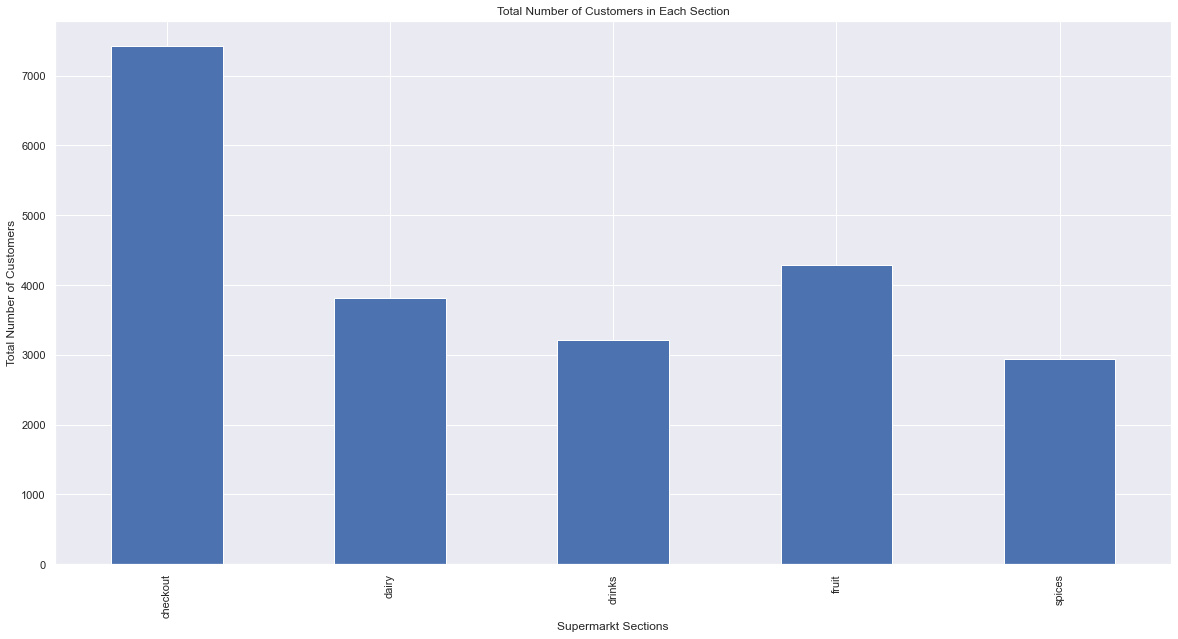

In [79]:
week.groupby(['location'])['customer'].nunique().plot(kind='bar', figsize=(20, 10))
plt.ylabel('Total Number of Customers')
plt.xlabel('Supermarkt Sections')
plt.title('Total Number of Customers in Each Section')

In [76]:
week['location'].value_counts()

checkout    7417
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: location, dtype: int64

### Number of customers in each section over time

In [77]:
week['date'] = pd.to_datetime(week['timestamp']).dt.date
week['day'] = pd.to_datetime(week['timestamp']).dt.day
week['time'] = pd.to_datetime(week['timestamp']).dt.time
week['hour'] = pd.to_datetime(week['timestamp']).dt.hour

In [78]:
week.head(10)

,timestamp,customer_no,location,customer,date,day,time,hour
0,2019-09-02 07:03:00,1,dairy,Mo1,2019-09-02,2,07:03:00,7
1,2019-09-02 07:03:00,2,dairy,Mo2,2019-09-02,2,07:03:00,7
2,2019-09-02 07:04:00,3,dairy,Mo3,2019-09-02,2,07:04:00,7
3,2019-09-02 07:04:00,4,dairy,Mo4,2019-09-02,2,07:04:00,7
4,2019-09-02 07:04:00,5,spices,Mo5,2019-09-02,2,07:04:00,7
5,2019-09-02 07:04:00,6,spices,Mo6,2019-09-02,2,07:04:00,7
6,2019-09-02 07:04:00,7,spices,Mo7,2019-09-02,2,07:04:00,7
7,2019-09-02 07:04:00,8,fruit,Mo8,2019-09-02,2,07:04:00,7
8,2019-09-02 07:05:00,1,checkout,Mo1,2019-09-02,2,07:05:00,7
9,2019-09-02 07:05:00,5,checkout,Mo5,2019-09-02,2,07:05:00,7


In [43]:
section_traffic = week.groupby(['location', 'hour'])['customer'].nunique()
section_traffic.df = pd.DataFrame(section_traffic)


In [45]:
section_traffic.df

customer
location hour          
checkout 7          454
         8          677
         9          455
         10         427
         11         342
...                 ...
spices   17         219
         18         275
         19         309
         20         201
         21         104

[75 rows x 1 columns]

Text(0.5, 1.0, 'Number of customers per section over daytime')

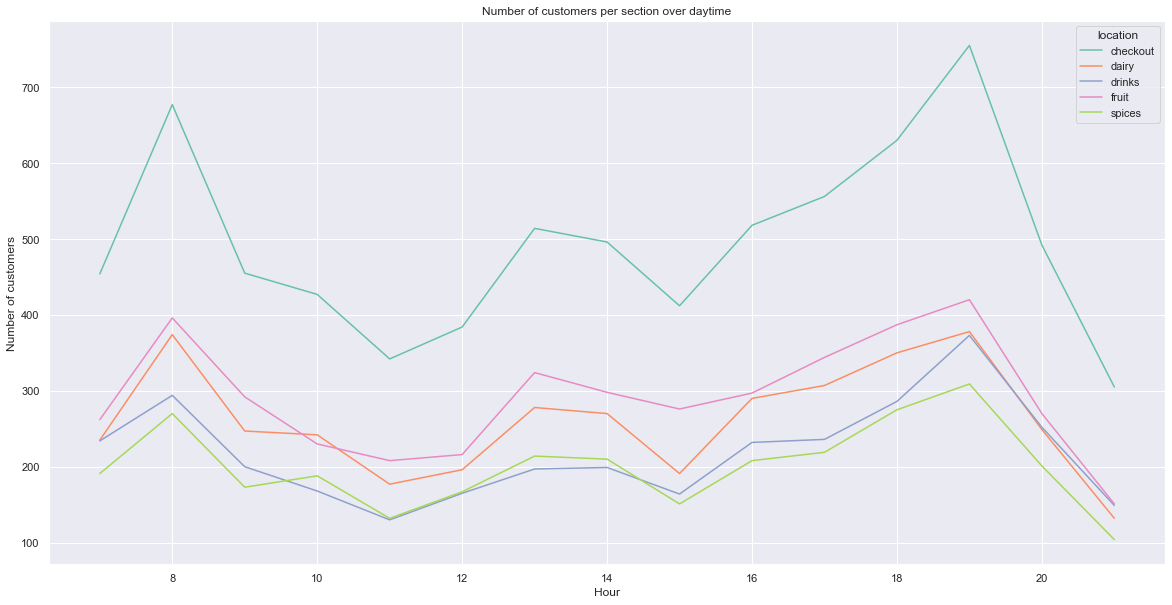

In [55]:
sns.lineplot(x='hour', y='customer', data = section_traffic.df, hue='location', palette='Set2')
sns.set(rc = {'figure.figsize':(20,10)})
plt.ylabel('Number of customers')
plt.xlabel('Hour')
plt.title('Number of customers per section over daytime')

### Number of customers at checkout per day

<AxesSubplot:xlabel='day'>

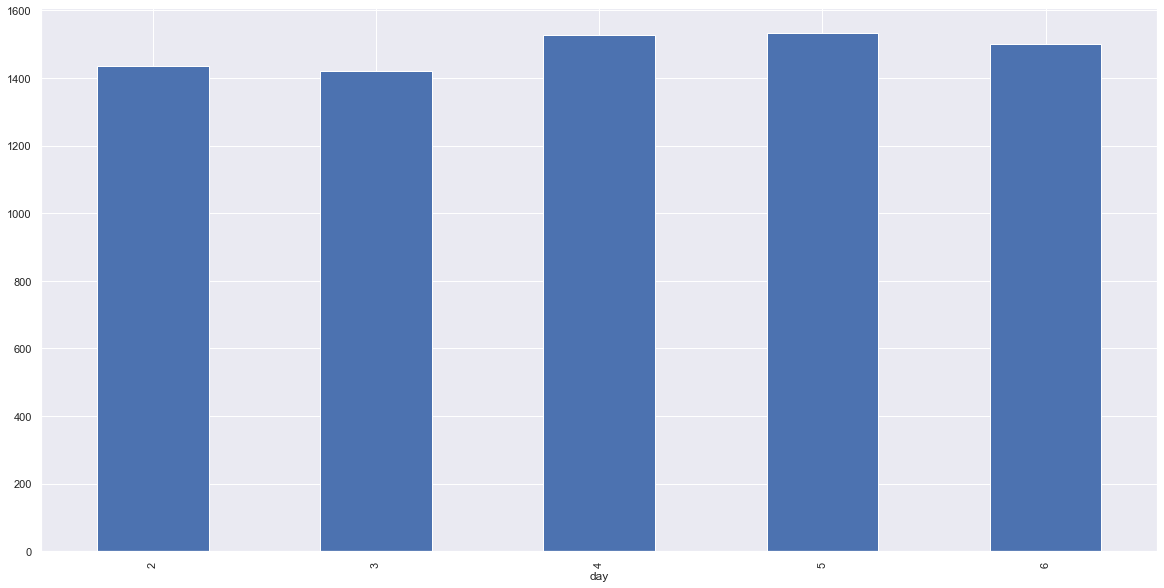

In [86]:
checkout = week[week['location'] == 'checkout']
checkout.groupby(['day'])['customer_no'].count().plot(kind='bar')

### Time each customer spent in the supermarket

In [89]:
# Entrytime of customer 
entrytime = week[['timestamp','customer', 'hour']].groupby('customer').min()
entrytime = entrytime.rename(columns={'timestamp': 'entry'})

#Exittime of customer
exittime = week[['timestamp','customer']].groupby('customer').max()
exittime = exittime.rename(columns={'timestamp': 'exit'})

#Dataframe creation of entry and exit
week_time = pd.concat([entrytime, exittime], axis=1)
week_time.head()

,entry,hour,exit
customer,,,
Fr1,2019-09-06 07:00:00,7,2019-09-06 07:05:00
Fr10,2019-09-06 07:06:00,7,2019-09-06 07:11:00
Fr100,2019-09-06 08:03:00,8,2019-09-06 08:04:00
Fr1000,2019-09-06 17:19:00,17,2019-09-06 17:20:00
Fr1001,2019-09-06 17:19:00,17,2019-09-06 17:29:00


In [92]:
#Calcuation of stay duration of each customer
week_time['duration'] = pd.to_datetime(week_time['exit']) - pd.to_datetime(week_time['entry'])
week_time.head()

,entry,hour,exit,duration
customer,,,,
Fr1,2019-09-06 07:00:00,7,2019-09-06 07:05:00,0 days 00:05:00
Fr10,2019-09-06 07:06:00,7,2019-09-06 07:11:00,0 days 00:05:00
Fr100,2019-09-06 08:03:00,8,2019-09-06 08:04:00,0 days 00:01:00
Fr1000,2019-09-06 17:19:00,17,2019-09-06 17:20:00,0 days 00:01:00
Fr1001,2019-09-06 17:19:00,17,2019-09-06 17:29:00,0 days 00:10:00


### Total number of customers in the supermarket over time

[Text(0, 0, '1544'),
 Text(0, 0, '2290'),
 Text(0, 0, '1520'),
 Text(0, 0, '1431'),
 Text(0, 0, '1111'),
 Text(0, 0, '1252'),
 Text(0, 0, '1754'),
 Text(0, 0, '1650'),
 Text(0, 0, '1335'),
 Text(0, 0, '1742'),
 Text(0, 0, '1889'),
 Text(0, 0, '2215'),
 Text(0, 0, '2558'),
 Text(0, 0, '1655'),
 Text(0, 0, '931')]

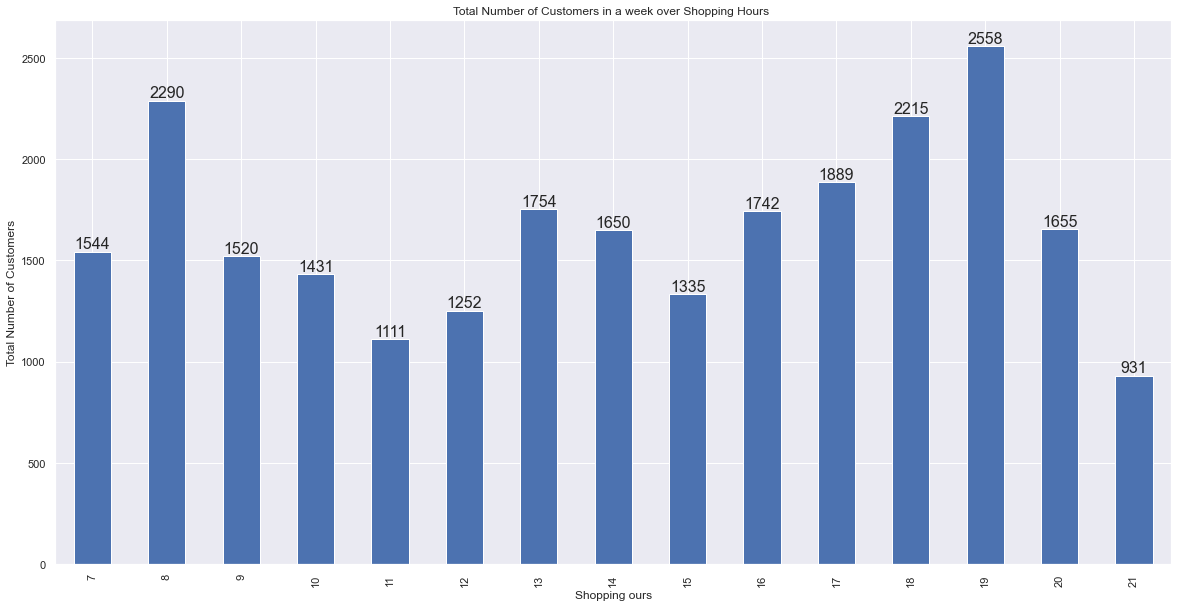

In [100]:
plot = week.groupby(['hour'])['customer'].count().plot(kind='bar', figsize=(20,10))
plt.ylabel('Total Number of Customers')
plt.xlabel('Shopping ours')
plt.title('Total Number of Customers in a week over Shopping Hours ')
plt.bar_label(plot.containers[0],size=16,label_type='edge')

## Transition Probability Matrix

The transition probability matrix will provide the probabilities of customers changing from one aisles to the next, for example from 'fruits' to 'dairy'. These probabilities are later required for the simulation of the customer behavior.

In [101]:
week['after'] = week.groupby(['customer'])['location'].shift(-1)

In [102]:
week.head(10)

,timestamp,customer_no,location,customer,date,day,time,hour,after
0,2019-09-02 07:03:00,1,dairy,Mo1,2019-09-02,2,07:03:00,7,checkout
1,2019-09-02 07:03:00,2,dairy,Mo2,2019-09-02,2,07:03:00,7,checkout
2,2019-09-02 07:04:00,3,dairy,Mo3,2019-09-02,2,07:04:00,7,checkout
3,2019-09-02 07:04:00,4,dairy,Mo4,2019-09-02,2,07:04:00,7,checkout
4,2019-09-02 07:04:00,5,spices,Mo5,2019-09-02,2,07:04:00,7,checkout
5,2019-09-02 07:04:00,6,spices,Mo6,2019-09-02,2,07:04:00,7,dairy
6,2019-09-02 07:04:00,7,spices,Mo7,2019-09-02,2,07:04:00,7,drinks
7,2019-09-02 07:04:00,8,fruit,Mo8,2019-09-02,2,07:04:00,7,checkout
8,2019-09-02 07:05:00,1,checkout,Mo1,2019-09-02,2,07:05:00,7,NaN
9,2019-09-02 07:05:00,5,checkout,Mo5,2019-09-02,2,07:05:00,7,NaN


In [103]:
week['after'] = week['after'].fillna(week['location'])
week.head(10)

,timestamp,customer_no,location,customer,date,day,time,hour,after
0,2019-09-02 07:03:00,1,dairy,Mo1,2019-09-02,2,07:03:00,7,checkout
1,2019-09-02 07:03:00,2,dairy,Mo2,2019-09-02,2,07:03:00,7,checkout
2,2019-09-02 07:04:00,3,dairy,Mo3,2019-09-02,2,07:04:00,7,checkout
3,2019-09-02 07:04:00,4,dairy,Mo4,2019-09-02,2,07:04:00,7,checkout
4,2019-09-02 07:04:00,5,spices,Mo5,2019-09-02,2,07:04:00,7,checkout
5,2019-09-02 07:04:00,6,spices,Mo6,2019-09-02,2,07:04:00,7,dairy
6,2019-09-02 07:04:00,7,spices,Mo7,2019-09-02,2,07:04:00,7,drinks
7,2019-09-02 07:04:00,8,fruit,Mo8,2019-09-02,2,07:04:00,7,checkout
8,2019-09-02 07:05:00,1,checkout,Mo1,2019-09-02,2,07:05:00,7,checkout
9,2019-09-02 07:05:00,5,checkout,Mo5,2019-09-02,2,07:05:00,7,checkout


In [104]:
trans_prob = pd.crosstab(week['location'], week['after'], normalize=0)
trans_prob

after,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.390041,0.002992,0.222483,0.189357,0.195127
drinks,0.536748,0.027145,0.000512,0.218950,0.216645
fruit,0.498829,0.237993,0.136080,0.001367,0.125732
spices,0.250666,0.323122,0.272776,0.152104,0.001332


In [116]:
prob_array = np.array(trans_prob)
prob_array[2]

array([5.36747759e-01, 2.71446863e-02, 5.12163892e-04, 2.18950064e-01,
       2.16645327e-01])

<AxesSubplot:xlabel='after', ylabel='location'>

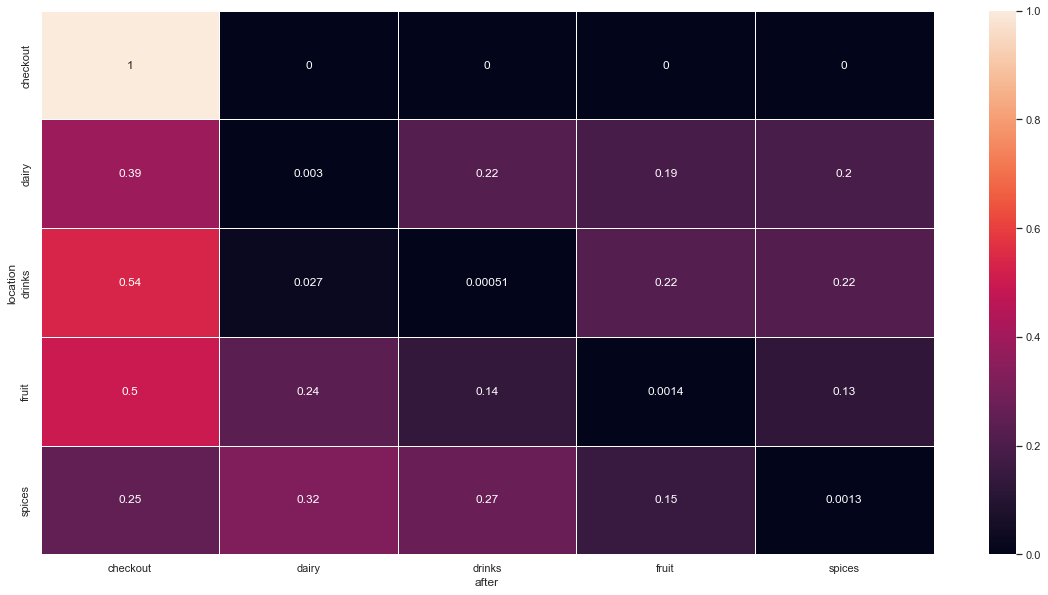

In [105]:
sns.heatmap(trans_prob, annot=True, linewidths=.9)

## Customer Simulation

In [138]:
class Customer():
    '''a single customer that moves through the supermarket in a MCMC simulation'''

    def __init__(self, name, budget=100):
        self.name = name
        self.state = random.choice(['spices', 'drinks', 'fruit', 'dairy'])
        self.budget = budget
        self.transition_probs = trans_prob 
        self.is_active = True
   
        
    def __repr__(self):
        return f'The customer called {self.name} is currently in aisle {self.state}. The budget is {self.budget}'
    
    def next_state(self):
        
        aisles = ['checkout', 'dairy', 'drinks', 'fruit', 'spices']
        
        if self.state == 'dairy':
            self.state_new = choice(aisles, 1, p=(prob_array[1]))
        elif self.state == 'drinks':
            self.state_new = choice(aisles, 1, p=(prob_array[2]))
        elif self.state == 'fruit':
            self.state_new = choice(aisles, 1, p=(prob_array[3]))
        elif self.state == 'spices':
            self.state_new = choice(aisles, 1, p=(prob_array[4]))
    
        print(f'The customer has been in aisle {self.state} and is now in aisle {self.state_new}')
        
        if self.state == 'checkout':
            self.set_status(False)  
    
    def is_active(self):
        if self.state_new == 'checkout':
            print('True')
        else:
            print('False')

In [139]:
cust1 = Customer("Jake")
cust2 = Customer("Margaret")

In [147]:
cust2

The customer called Margaret is currently in aisle fruit. The budget is 100

In [146]:
cust2.next_state()

The customer has been in aisle fruit and is now in aisle ['dairy']


## Exploratory Data Analysis

Analysis of customer behavior based on the monday data set

### Missing values?

In [504]:
monday.isnull().sum()

timestamp      0
customer_no    0
location       0
customer       0
dtype: int64

### Number of customers per day

In [505]:
monday['customer_no'].nunique()

1447

### Calculate the total number of customers in each section

In [506]:
monday.groupby(['location'])['customer_no'].nunique()

location
checkout    1437
dairy        720
drinks       661
fruit        827
spices       584
Name: customer_no, dtype: int64

### Calculate the total number of customers in each section over time

In [507]:
monday.groupby(['location', 'timestamp'])['customer_no'].nunique()

location  timestamp          
checkout  2019-09-02 07:05:00    2
          2019-09-02 07:06:00    2
          2019-09-02 07:07:00    1
          2019-09-02 07:08:00    3
          2019-09-02 07:09:00    1
                                ..
spices    2019-09-02 21:43:00    1
          2019-09-02 21:44:00    1
          2019-09-02 21:46:00    2
          2019-09-02 21:48:00    1
          2019-09-02 21:49:00    2
Name: customer_no, Length: 2797, dtype: int64

In [508]:
monday['hour'] = pd.to_datetime(monday['timestamp']).dt.hour

In [509]:
monday.head()

,timestamp,customer_no,location,customer,hour
0,2019-09-02 07:03:00,1,dairy,Mo1,7
1,2019-09-02 07:03:00,2,dairy,Mo2,7
2,2019-09-02 07:04:00,3,dairy,Mo3,7
3,2019-09-02 07:04:00,4,dairy,Mo4,7
4,2019-09-02 07:04:00,5,spices,Mo5,7


In [510]:
monday_hour = monday.groupby(['location', 'hour'])['customer_no'].nunique().reset_index()
monday_hour.head(15)

,location,hour,customer_no
0,checkout,7,92
1,checkout,8,112
2,checkout,9,85
3,checkout,10,90
4,checkout,11,55
5,checkout,12,73
6,checkout,13,120
7,checkout,14,90
8,checkout,15,94
9,checkout,16,86


In [511]:
monday_hour.groupby(monday_hour['hour'])['customer_no'].nunique()

hour
7     4
8     5
9     5
10    5
11    5
12    5
13    5
14    5
15    4
16    5
17    5
18    4
19    5
20    5
21    5
Name: customer_no, dtype: int64

### Display the number of customers at checkout over time

In [46]:
sns.lineplot(x='hour', y='customer_no', data = section_traffic.df, hue='location', palette='Set2')
sns.set(rc = {'figure.figsize':(15,8)})

ValueError: Could not interpret value `customer_no` for parameter `y`

### Calculate the time each customer spent in the market

In [513]:
monday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    4884 non-null   object
 1   customer_no  4884 non-null   int64 
 2   location     4884 non-null   object
 3   customer     4884 non-null   object
 4   hour         4884 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 190.9+ KB


In [514]:
monday.head()

,timestamp,customer_no,location,customer,hour
0,2019-09-02 07:03:00,1,dairy,Mo1,7
1,2019-09-02 07:03:00,2,dairy,Mo2,7
2,2019-09-02 07:04:00,3,dairy,Mo3,7
3,2019-09-02 07:04:00,4,dairy,Mo4,7
4,2019-09-02 07:04:00,5,spices,Mo5,7


In [515]:
#monday['date'] = pd.to_datetime(monday['timestamp']).dt.date
#monday['time'] = pd.to_datetime(monday['timestamp']).dt.time
#monday.head(5)

In [516]:
# Entrytime of customer 
entrytime = monday[['timestamp','customer', 'hour']].groupby('customer').min()
entrytime = entrytime.rename(columns={'timestamp': 'entry'})

#Exittime of customer
exittime = monday[['timestamp','customer']].groupby('customer').max()
exittime = exittime.rename(columns={'timestamp': 'exit'})

#Dataframe creation of entry and exit
merge = pd.concat([entrytime, exittime], axis=1)
merge.head()

,entry,hour,exit
customer,,,
Mo1,2019-09-02 07:03:00,7,2019-09-02 07:05:00
Mo10,2019-09-02 07:06:00,7,2019-09-02 07:08:00
Mo100,2019-09-02 07:56:00,7,2019-09-02 08:03:00
Mo1000,2019-09-02 17:44:00,17,2019-09-02 17:51:00
Mo1001,2019-09-02 17:45:00,17,2019-09-02 17:46:00


In [517]:
#Calcuation of stay duration of each customer
merge['duration'] = pd.to_datetime(merge['exit']) - pd.to_datetime(merge['entry'])
merge.head()

,entry,hour,exit,duration
customer,,,,
Mo1,2019-09-02 07:03:00,7,2019-09-02 07:05:00,0 days 00:02:00
Mo10,2019-09-02 07:06:00,7,2019-09-02 07:08:00,0 days 00:02:00
Mo100,2019-09-02 07:56:00,7,2019-09-02 08:03:00,0 days 00:07:00
Mo1000,2019-09-02 17:44:00,17,2019-09-02 17:51:00,0 days 00:07:00
Mo1001,2019-09-02 17:45:00,17,2019-09-02 17:46:00,0 days 00:01:00


In [891]:
avg_time = merge.groupby(['hour'])['duration'].mean()
avg_time_df = pd.DataFrame(avg_time)

avg_time_df

,duration
hour,
7,0 days 00:06:13.529411764
8,0 days 00:06:40.353982300
9,0 days 00:07:04.772727272
10,0 days 00:06:35.250000
11,0 days 00:05:31.071428571
12,0 days 00:07:13.670886075
13,0 days 00:06:50.420168067
14,0 days 00:06:33.488372093
15,0 days 00:07:12.127659574


In [895]:
avg_time_df = avg_time_df.reset_index()

In [900]:
avg_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   hour      15 non-null     int64          
 1   duration  15 non-null     timedelta64[ns]
dtypes: int64(1), timedelta64[ns](1)
memory usage: 368.0 bytes


<AxesSubplot:xlabel='hour', ylabel='duration'>

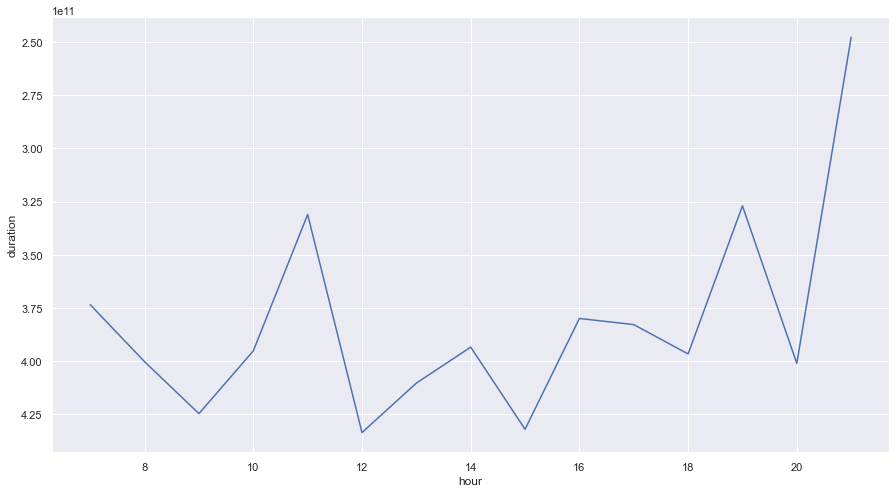

In [899]:
sns.lineplot(x='hour', y='duration', data = avg_time_df)

In [518]:
merge['duration'].describe()

count                         1447
mean     0 days 00:06:26.371803731
std      0 days 00:06:20.300576298
min                0 days 00:00:00
25%                0 days 00:02:00
50%                0 days 00:04:00
75%                0 days 00:08:00
max                0 days 00:51:00
Name: duration, dtype: object

In [519]:
#Calculation of duration depending on entry hour


### Calculate the total number of customers in the supermarket over time.

In [520]:
time = monday.drop_duplicates(subset=["customer_no"], keep='first')
time

,timestamp,customer_no,location,customer,hour
0,2019-09-02 07:03:00,1,dairy,Mo1,7
1,2019-09-02 07:03:00,2,dairy,Mo2,7
2,2019-09-02 07:04:00,3,dairy,Mo3,7
3,2019-09-02 07:04:00,4,dairy,Mo4,7
4,2019-09-02 07:04:00,5,spices,Mo5,7
...,...,...,...,...,...
4867,2019-09-02 21:47:00,1443,fruit,Mo1443,21
4874,2019-09-02 21:48:00,1444,spices,Mo1444,21
4881,2019-09-02 21:49:00,1445,dairy,Mo1445,21
4882,2019-09-02 21:50:00,1446,dairy,Mo1446,21


In [521]:
time['count'] = 1

/var/folders/py/2yb9z9p52zgfhxcjm27d9nw00000gn/T/ipykernel_13628/809510992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['count'] = 1


In [522]:
time

,timestamp,customer_no,location,customer,hour,count
0,2019-09-02 07:03:00,1,dairy,Mo1,7,1
1,2019-09-02 07:03:00,2,dairy,Mo2,7,1
2,2019-09-02 07:04:00,3,dairy,Mo3,7,1
3,2019-09-02 07:04:00,4,dairy,Mo4,7,1
4,2019-09-02 07:04:00,5,spices,Mo5,7,1
...,...,...,...,...,...,...
4867,2019-09-02 21:47:00,1443,fruit,Mo1443,21,1
4874,2019-09-02 21:48:00,1444,spices,Mo1444,21,1
4881,2019-09-02 21:49:00,1445,dairy,Mo1445,21,1
4882,2019-09-02 21:50:00,1446,dairy,Mo1446,21,1


<AxesSubplot:xlabel='hour', ylabel='count'>

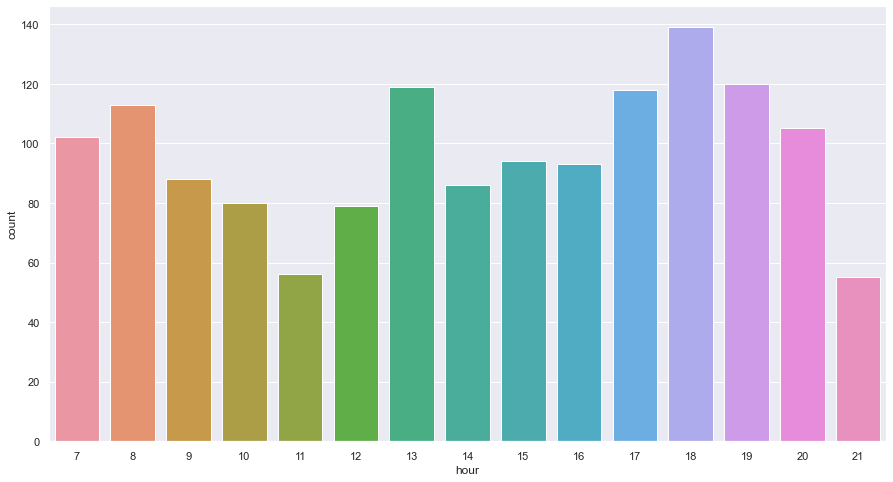

In [523]:
customers_overtime = time.groupby(['hour'])['count'].sum().reset_index()
sns.barplot(x='hour', y='count', data=customers_overtime)

## Transition Probability Matrix

- Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [524]:
week

,index,timestamp,customer_no,location,customer,date,time
0,0,2019-09-02 07:03:00,1,dairy,Mo1,2019-09-02,07:03:00
1,1,2019-09-02 07:03:00,2,dairy,Mo2,2019-09-02,07:03:00
2,2,2019-09-02 07:04:00,3,dairy,Mo3,2019-09-02,07:04:00
3,3,2019-09-02 07:04:00,4,dairy,Mo4,2019-09-02,07:04:00
4,4,2019-09-02 07:04:00,5,spices,Mo5,2019-09-02,07:04:00
...,...,...,...,...,...,...,...
24872,5120,2019-09-06 21:50:00,1500,dairy,Fr1500,2019-09-06,21:50:00
24873,5121,2019-09-06 21:50:00,1507,checkout,Fr1507,2019-09-06,21:50:00
24874,5122,2019-09-06 21:50:00,1508,checkout,Fr1508,2019-09-06,21:50:00
24875,5123,2019-09-06 21:50:00,1509,drinks,Fr1509,2019-09-06,21:50:00


In [525]:
week.loc[week['customer']=='Fr1']

,index,timestamp,customer_no,location,customer,date,time
19752,0,2019-09-06 07:00:00,1,dairy,Fr1,2019-09-06,07:00:00
19764,12,2019-09-06 07:04:00,1,spices,Fr1,2019-09-06,07:04:00
19767,15,2019-09-06 07:05:00,1,checkout,Fr1,2019-09-06,07:05:00


In [526]:
week['after'] = week.groupby(['customer'])['location'].shift(-1)
week

,index,timestamp,customer_no,location,customer,date,time,after
0,0,2019-09-02 07:03:00,1,dairy,Mo1,2019-09-02,07:03:00,checkout
1,1,2019-09-02 07:03:00,2,dairy,Mo2,2019-09-02,07:03:00,checkout
2,2,2019-09-02 07:04:00,3,dairy,Mo3,2019-09-02,07:04:00,checkout
3,3,2019-09-02 07:04:00,4,dairy,Mo4,2019-09-02,07:04:00,checkout
4,4,2019-09-02 07:04:00,5,spices,Mo5,2019-09-02,07:04:00,checkout
...,...,...,...,...,...,...,...,...
24872,5120,2019-09-06 21:50:00,1500,dairy,Fr1500,2019-09-06,21:50:00,NaN
24873,5121,2019-09-06 21:50:00,1507,checkout,Fr1507,2019-09-06,21:50:00,NaN
24874,5122,2019-09-06 21:50:00,1508,checkout,Fr1508,2019-09-06,21:50:00,NaN
24875,5123,2019-09-06 21:50:00,1509,drinks,Fr1509,2019-09-06,21:50:00,NaN


In [527]:
week['location'].value_counts()

checkout    7417
fruit       5122
dairy       4679
drinks      3905
spices      3754
Name: location, dtype: int64

In [528]:
week['after'].value_counts()

checkout    7417
drinks      2762
dairy       2538
spices      2403
fruit       2312
Name: after, dtype: int64

In [532]:
week['after'].isnull().sum()

0

In [531]:
week['after'] = week['after'].fillna(week['location'])

week

,index,timestamp,customer_no,location,customer,date,time,after
0,0,2019-09-02 07:03:00,1,dairy,Mo1,2019-09-02,07:03:00,checkout
1,1,2019-09-02 07:03:00,2,dairy,Mo2,2019-09-02,07:03:00,checkout
2,2,2019-09-02 07:04:00,3,dairy,Mo3,2019-09-02,07:04:00,checkout
3,3,2019-09-02 07:04:00,4,dairy,Mo4,2019-09-02,07:04:00,checkout
4,4,2019-09-02 07:04:00,5,spices,Mo5,2019-09-02,07:04:00,checkout
...,...,...,...,...,...,...,...,...
24872,5120,2019-09-06 21:50:00,1500,dairy,Fr1500,2019-09-06,21:50:00,dairy
24873,5121,2019-09-06 21:50:00,1507,checkout,Fr1507,2019-09-06,21:50:00,checkout
24874,5122,2019-09-06 21:50:00,1508,checkout,Fr1508,2019-09-06,21:50:00,checkout
24875,5123,2019-09-06 21:50:00,1509,drinks,Fr1509,2019-09-06,21:50:00,drinks


In [857]:
prob = pd.crosstab(week['location'], week['after'], normalize=0)
prob

after,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.390041,0.002992,0.222483,0.189357,0.195127
drinks,0.536748,0.027145,0.000512,0.218950,0.216645
fruit,0.498829,0.237993,0.136080,0.001367,0.125732
spices,0.250666,0.323122,0.272776,0.152104,0.001332


<AxesSubplot:xlabel='after', ylabel='location'>

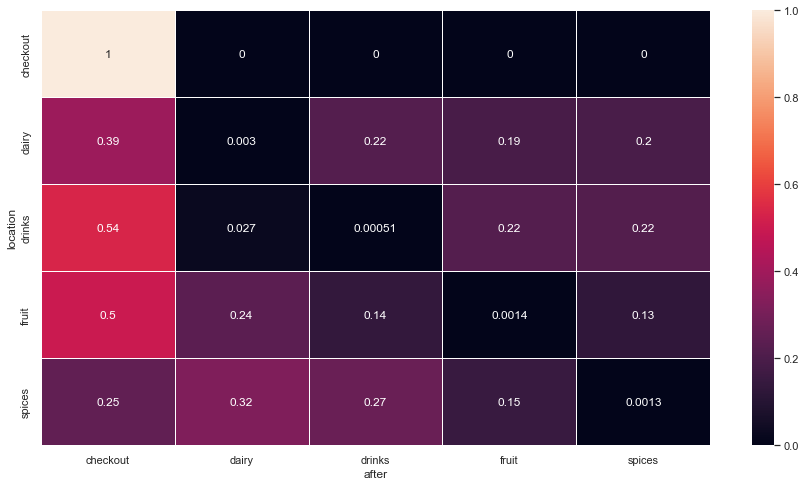

In [859]:
sns.heatmap(prob, annot=True, linewidths=.9)

In [860]:
prob_array = np.array(prob)
prob_array.shape

(5, 5)

In [861]:
sum(prob_array[1]), sum(prob_array[2]), sum(prob_array[3]), sum(prob_array[4])

(1.0, 1.0, 0.9999999999999999, 0.9999999999999998)

## Customer Class

In [862]:
class Customer():
    '''a single customer that moves through the supermarket in a MCMC simulation'''

    def __init__(self, name, budget=100):
        self.name = name
        self.state = random.choice(['spices', 'drinks', 'fruit', 'dairy'])
        self.budget = budget
        self.transition_probs = prob ##### transition probs as column for each state to the next one?
        
    def __repr__(self):
        return f'The customer called {self.name} is currently in aisle {self.state}. The budget is {self.budget}'
    
    def next_state(self):
        
        aisles = ['checkout', 'dairy', 'drinks', 'fruit', 'spices']
        
        if self.state == 'dairy':
            self.state_new = choice(aisles, 1, p=(prob_array[1]))
        elif self.state == 'drinks':
            self.state_new = choice(aisles, 1, p=(prob_array[2]))
        elif self.state == 'fruit':
            self.state_new = choice(aisles, 1, p=(prob_array[3]))
        elif self.state == 'spices':
            self.state_new = choice(aisles, 1, p=(prob_array[4]))
    
        print(f'The customer has been in aisle {self.state} and is now in aisle {self.state_new}')
       # print(f'The customer {self.name} was in aisle {self.state} and is now in aisle {self.state_new}')
        ## modify to do a weighted choice
        ## 
    
    def is_active(self):
        if self.state_new == 'checkout':
            print('True')
        else:
            print('False')
       

In [867]:
cust1 = Customer("Jake")
cust2 = Customer("Margaret", "spices")

In [868]:
cust1.state

'fruit'

In [869]:
aisles = ['checkout', 'dairy', 'drinks', 'fruit', 'spices']
aisles

['checkout', 'dairy', 'drinks', 'fruit', 'spices']

In [870]:
cust1.next_state()

The customer has been in aisle fruit and is now in aisle ['drinks']


## Multiple Customer Classes

In [ ]:
from datetime import datetime
from tiles_skeleton import SupermarketMap, Customer
import random

from faker import Faker
faker = Faker(use_weighting = False)



class Supermarket:
    """manages multiple Customer instances that are currently in the market.
    """

    def __init__(self):        
        # a list of Customer objects
        self.customers = []
        self.minutes = 0
        self.last_id = 0

    def __repr__(self):
        return 'Supermarket class' # TODO

    def get_time(self):
        """current time in HH:MM format,
        """
        return datetime.now().strftime("%H:%M")

    def print_customers(self):
        """print all customers with the current time and id in CSV format.
        """
        for customer in self.customers:
            print(f'{customer},{self.get_time()},{customer.id}')
        return None

    def next_minute(self):
        """propagates all customers to the next state.
        """
        for customer in self.customers:
            customer.next_state()
        return None
    
    def add_new_customers(self):
        """randomly creates new customers.
        """         
        return Customer(self.last_id + 1, faker.first_name(), random.choices(['dairy', 'drinks', 'fruit', 'spices']), 200)

    def remove_exitsting_customers(self):
        """removes every customer that is not active any more.
        """
        for customer in self.customers:
            if customer.state == ['checkout']:
                customer.is_active = False
                self.customers.remove(customer.id)
                
        return None